<a href="https://colab.research.google.com/github/MananShukla7/TensorFlow-NLP/blob/main/01_intro_tf_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Intoduction to NLP Fundamentals in TensorFlow

NLP is used to make sense of the textual data with not so textual methods!
THings like tokenization,embeddings etc are used

In [1]:
## Check for CPU


In [2]:
!nvidia-smi -L


GPU 0: Tesla T4 (UUID: GPU-dcd37850-a4f3-4c92-8d32-ccd8921c8825)


In [3]:
#Import helper func


#Get a text dataset

The dataset that we are using is kaggles intro to nlp dataset
(Tweets wether they are disaster or not disaster).config/

Source-https://www.kaggle.com/c/nlp-getting-started

In [4]:

!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2023-05-29 16:16:29--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.009s  

2023-05-29 16:16:29 (64.2 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
import zipfile
def unzip_data(filename):
  zip_ref=zipfile.ZipFile(filename,"r")
  zip_ref.extractall()
  zip_ref.close()


In [6]:
#Ubzip data
unzip_data("/content/nlp_getting_started.zip")

In [7]:
import pandas as pd
df=pd.read_csv("/content/train.csv")
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [8]:
df.shape

(7613, 5)

In [9]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [10]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [12]:
df["text"][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [13]:
df_shuffle=df.sample(frac=1,random_state=42)
df_shuffle.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [14]:
#HOw many examples of each class are there
df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [15]:
df.location.value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

In [16]:
test_df=pd.read_csv("/content/test.csv")
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


#Visualizing a text dataset

In [17]:
#How many total samples??
len(df),len(test_df)

(7613, 3263)

In [18]:
class_names=["not a real disaster","real disaster"]

#Lets visualize some random training examples!

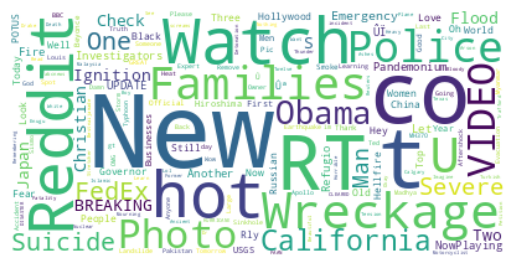

In [19]:
#Creating the world could of tweets
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = " ".join(cat.split()[0] for cat in df.text)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
import random 
i=0
random_index=random.randint(0,len(df)-5)
for row in df_shuffle[["text","target"]][i:i+10].itertuples():
  _,text,target=row
  print(f"Target:{target}","{real disaster}" if target>0 else "{Not real disaster}")
  print(f"Text:\n{text}\n")
  print("---\n")
  


Target:1 {real disaster}
Text:
So you have a new weapon that can cause un-imaginable destruction.

---

Target:0 {Not real disaster}
Text:
The f$&amp;@ing things I do for #GISHWHES Just got soaked in a deluge going for pads and tampons. Thx @mishacollins @/@

---

Target:1 {real disaster}
Text:
DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe CoL police can catch a pickpocket in Liverpool Stree... http://t.co/vXIn1gOq4Q

---

Target:0 {Not real disaster}
Text:
Aftershock back to school kick off was great. I want to thank everyone for making it possible. What a great night.

---

Target:0 {Not real disaster}
Text:
in response to trauma Children of Addicts develop a defensive self - one that decreases vulnerability. (3

---

Target:0 {Not real disaster}
Text:
@Calum5SOS you look like you got caught in a rainstorm this is amazing and disgusting at the same time

---

Target:1 {real disaster}
Text:
my favorite lady came to our volunteer meeting
hopefully joining her youth collision and i am 

###Split into training and validation sets


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(df_shuffle['text'].to_numpy(),df_shuffle['target'].to_numpy(),test_size=0.1,random_state=42)
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((6851,), (762,), (6851,), (762,))

In [22]:
X_train[:10],y_train[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

##Converting text into numbers

When dealing with a text problem, one od the first things is to convert text to numbers.

There area few ways to do this, namely:
- Tokenization - direct mapping of token(a token could be a word or a character) to number

- Embedding- create a embedding layer that will create a dense and small matrix with feature vector for each word or character
we can create a feature vector of man gamti size

##Text vectorization (tokenization)

In [23]:
X_train[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [24]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

text_vectorization=TextVectorization(max_tokens=10000,#None gives error when pad_to+max set to none
                                     standardize="lower_and_strip_punctuation",
                                     split="whitespace",
                                     ngrams=None ,#Create group of n words if none then treats each word on its own
                                     output_mode="int",
                                     output_sequence_length=None, #Pads the all sentences to longest tweets! none means does it to the max length of sentence is value like 8 is set then pads 8 0s to the sentence!!
                                     pad_to_max_tokens=True 
                                     )


In [25]:
#FInd the avg number of tokens in the training tweets
round(sum([len(i.split()) for i in X_train])/len(X_train))

15

In [26]:
#Setup the text vectorization variable
max_vocab_length=10000
max_length=15

text_vectorization=TextVectorization(max_tokens=max_vocab_length,
                                     output_mode="int",
                                     output_sequence_length=max_length)

In [27]:
#adapt==fit
text_vectorization.adapt(X_train)

In [28]:
sample_sentence="There's a flood on my street ahhh!!"
text_vectorization([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,  11,  13, 698,   1,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [29]:
#Choose trandom samples from training dataset and tokenize it.
random_sentence=random.choice(X_train)
print(f"Sentence is : {random_sentence}\n")
v=text_vectorization(random_sentence)
v

Sentence is : Reuters: Russian 'food crematoria' provoke outrage amid crisis famine memories http://t.co/SI02QRgukA http://t.co/0C1y8g7E9p



<tf.Tensor: shape=(15,), dtype=int64, numpy=
array([ 701,  835,  260, 1147, 1114,  935,  714,  745,  459,  647,    1,
          1,    0,    0,    0])>

In [30]:
#Get the unique words in the vocabulary
words_in_the_vocab=text_vectorization.get_vocabulary()
top_5_words=words_in_the_vocab[:5]
bottom_5_words=words_in_the_vocab[-5:]
print(f"top 5 words: {top_5_words}")
print(f"least 5 words: {bottom_5_words}")
print(f"total words: {len(words_in_the_vocab)}")

top 5 words: ['', '[UNK]', 'the', 'a', 'in']
least 5 words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']
total words: 10000


In [31]:
words_in_the_vocab[:5]

['', '[UNK]', 'the', 'a', 'in']

###Creating the embedding
turns a positive integer matrix to dense float matrix
To make our embedding we are going to use the tf embedding layer

The parameter that we care most about for our embedding layer:
- `input_dim`=THe size of our vocab_length

- `output_dim`=THe o/p size of our embedding layer 100 the 100 dims

- `input_lenght`= Length of the sequence being passed to the embedding layer

In [32]:
from tensorflow.keras import layers

embedding=layers.Embedding(input_dim=max_vocab_length, #10000
                 output_dim=128,
                 input_length=max_length)#15
            

In [33]:
random_sentence=random.choice(X_train)
vectorized=text_vectorization(random_sentence)
embedded=embedding(vectorized)
print(f"Original Sentence: {random_sentence}")
print(f"Vectorized Sentence: {vectorized}")
print(f"Word embedded sentence:\n {embedded}")

Original Sentence: Perspectives on Terrorism - Understanding Jihadi Proto-States: http://t.co/d5h4jif1y3
Vectorized Sentence: [9840   11  361 2633    1 9519    1    0    0    0    0    0    0    0
    0]
Word embedded sentence:
 [[ 0.02203817 -0.0438812   0.03189972 ...  0.01156825  0.03290443
   0.01965461]
 [-0.01514734 -0.0247      0.01291617 ...  0.02289    -0.02980491
  -0.03198691]
 [-0.00558529  0.00725713 -0.0014473  ...  0.03287143 -0.00571894
  -0.02548239]
 ...
 [-0.02020171 -0.01808933 -0.01277502 ...  0.04998323 -0.00896049
   0.01496308]
 [-0.02020171 -0.01808933 -0.01277502 ...  0.04998323 -0.00896049
   0.01496308]
 [-0.02020171 -0.01808933 -0.01277502 ...  0.04998323 -0.00896049
   0.01496308]]


In [34]:
#CHeck out  a single token's embedding

embedded[0][0],embedded.shape,random_sentence

(<tf.Tensor: shape=(), dtype=float32, numpy=0.022038173>,
 TensorShape([15, 128]),
 'Perspectives on Terrorism - Understanding Jihadi Proto-States: http://t.co/d5h4jif1y3')

#Modelling experiments on our dataset

Now we've a got a way to turn our text sequence into tthe numbers, its time to start
building a series of modelling experiments

We will build and train following models:

* Model 0: Naive Bayed(baseline), (from sklearn)
* Model 1: Feed-forward neural network(dense model or linear in pytorch)
* Model 2:LSTM model(RNN)
* Model 3:GRU(RNN)
* Model 4:Bi-directional LSTM model(RNN)
* Model 5 :1D Convo NN
* Model 6: Tensorflow hub pretrained Feature extractor(using the transfer learing for nlp)
* Model 7:Same as the model 6 but with the 10 percent of the data

How are we going to approach all this??

* Create a model
* Build a model
* FIt a model
* Evaluate a model
* Predict based on the model!!

##Building a baseline model (Model 0)

---
As with all the ml modelling a=experiments ,we need to create a baseline to compare latter models with and get better idea about the working!!

> **NOTE:** Very common to use non dl models to use as baseline coz of the speed and then later using the dl to see if we can improve upone them!!


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB 
from sklearn import metrics


In [36]:
tf_vectorize=CountVectorizer()
X_train_tf=tf_vectorize.fit_transform(X_train)
X_train_tf.shape

(6851, 20076)

In [37]:
X_val_tf=tf_vectorize.transform(X_val)

In [38]:
X_test_tf=tf_vectorize.transform(test_df['text'])

In [39]:
tfidfVectorize=TfidfVectorizer()
X_train_idf=tfidfVectorize.fit_transform(X_train)
X_train_idf.shape

(6851, 20076)

In [40]:
bayesian=MultinomialNB()
bayesian.fit(X_train_tf,y_train)

MultinomialNB()

###Evaluating model using the validation set

In [41]:
y_val_pred_0=bayesian.predict(X_val_tf)

In [42]:
metrics.confusion_matrix(y_val,y_val_pred_0)

array([[370,  44],
       [103, 245]])

In [43]:
tf_score=bayesian.score(X_val_tf,y_val) ##Approx 80 percent accuracy!
tf_score

0.8070866141732284

In [44]:
def check_val(y_val,y_pred):
  from numpy import random
  samples=random.randint(0,len(y_val),size=[10])
  for sample in samples:
    print(f"Tweet: {test_df.iloc[sample,3]} \n the pred is:{class_names[y_pred[sample]]} | the actual value is: {class_names[y_val[sample]]}\n")

In [45]:
check_val(y_val,y_val_pred_0)

Tweet: Bioterrorism : Guidelines for Medical and Public Health Management (2002) http://t.co/zkUXHnoBaG http://t.co/FHgkYxffu5 
 the pred is:not a real disaster | the actual value is: not a real disaster

Tweet: FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/1CsEBhPLfh via @usatoday 
 the pred is:not a real disaster | the actual value is: real disaster

Tweet: Womens Flower Printed Shoulder Handbags Cross Body Metal Chain Satchel Bags Pink http://t.co/vBZqWzNxH7 http://t.co/NXIhHeP1Ea 
 the pred is:not a real disaster | the actual value is: not a real disaster

Tweet: @VaunWilmott - @PaysTara agrees that with the catastrophic loss of the love in the barn scene we are short 1 shirtless Michael. #Dominion 
 the pred is:real disaster | the actual value is: real disaster

Tweet: /criess blood/ Golden Wook is life. http://t.co/Fhb99ciCeT 
 the pred is:real disaster | the actual value is: real disaster

Tweet: Serial arsonist gets no bail not jail rel

###Making predictions on the test data

In [46]:
y_pred_0=bayesian.predict(X_test_tf)

In [47]:
y_pred_0[0]

1

In [48]:
test_df.iloc[0,3]

'Just happened a terrible car crash'

In [205]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [230]:
def check_pred(y_pred):
  from numpy import random
  samples=random.randint(0,len(y_pred),size=[10])
  for sample in samples:
      # print(f"Target: {test_df[sample,3]} | Pred: {y_pred[sample]} | Prob: {pred_probs[sample]}")
      print(f"Tweet: {test_df.iloc[sample,3]} \n the pred is:{class_names[y_pred[sample]]}\n")


In [232]:
check_pred(y_pred_0)

Tweet: 'Police Officer Wounded Suspect Dead After Exchanging Shots' http://t.co/guNq7ZTUn4 #????_????? 
 the pred is:real disaster

Tweet: Tried my 1st #beastburger by #beyondmeat.  nowhere near what i thought based on hype. Drowned in ketchup wasnt bad but w/dijon it sucked. 
 the pred is:not a real disaster

Tweet: Mega keen for hiking tomorrow! Hope i don't fall off a cliff haha!  #keen #fitness #yay #excitedmuch 
 the pred is:not a real disaster

Tweet: One Year On From #IS Massacre in #Sinjar Yazidis Blast Lack of Action over 3000--5000 Yazidis who remain enslaved: http://t.co/vnSn284ovw 
 the pred is:real disaster

Tweet: Womens Stylish Metal Chain Pearls Solid Hanbags Shoulder Cross Body Bags Golden http://t.co/oR0JZb9cFh http://t.co/6byul0ID4l 
 the pred is:not a real disaster

Tweet: JAKE I SWEAR TO GOD IF THEREÛªS ONE MORE GOD DAMN PIECE OF ALGAE IN THE PONDS I AM GOING TO DESTROY ALL THOSE LITTLE FISH.

#momtherbot 
 the pred is:not a real disaster

Tweet: Apollo Brown ÛÒ 

####using the tfidf vectorizer now with pipeline

In [51]:
#THE EASY WAY
from sklearn.pipeline import Pipeline
idf_model_0=Pipeline([
    ("tfidf",TfidfVectorizer()),
    ("clf",MultinomialNB())
])
idf_model_0.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [52]:
idf_score=idf_model_0.score(X_val,y_val)
idf_score

0.7926509186351706

In [53]:
#Since tf score is greayer thaan the idf score then keep it as baseline
baseline_score=tf_score

##Making the predictions on idf vals


In [54]:
y_idf_pred_0=idf_model_0.predict(test_df['text'])

In [55]:
check_pred(y_idf_pred_0)

Tweet: Love wounds 
 the pred is:not a real disaster

Tweet: My new sounds: War Zone https://t.co/hNXRfqRk3P on #SoundCloud 
 the pred is:not a real disaster

Tweet: Angry Woman Openly Accuses NEMA Of Stealing Relief Materials Meant For IDPs: An angry Internally Displaced woman... http://t.co/C1vzJOr2qz 
 the pred is:real disaster

Tweet: #ine #instyle Olap #world pres: http://t.co/PJaY74M2Fi How To Recognize A Hazardous Waste And The Multidimensi http://t.co/vr3wlQXl0G 
 the pred is:real disaster

Tweet: Oh god Diane is following them to the hostage exchange in a taxi. 
#RandomActsOfRomance 
 the pred is:real disaster

Tweet: If you build an army of 100 lions and their leader is a dog in any fight the lions will die like a dog. 
 the pred is:not a real disaster

Tweet: AMBULANCE SPRINTER AUTOMATIC FRONTLINE VEHICLE CHOICE OF 14 LEZ COMPLIANT | eBay http://t.co/7X3PDDbT0Z 
 the pred is:not a real disaster

Tweet: Corey White talking all dat shit but he got burned more than curlin irons

In [56]:
##idf validation
y_idf_val_pred=idf_model_0.predict(X_val)

In [57]:
print(metrics.classification_report(y_val,y_idf_val_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       414
           1       0.89      0.63      0.73       348

    accuracy                           0.79       762
   macro avg       0.82      0.78      0.78       762
weighted avg       0.81      0.79      0.79       762



In [58]:
print(metrics.classification_report(y_val,y_val_pred_0))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       414
           1       0.85      0.70      0.77       348

    accuracy                           0.81       762
   macro avg       0.81      0.80      0.80       762
weighted avg       0.81      0.81      0.80       762



#Badhama yes predictions maathi ketla saacha yes che?? precision Ratio b/w true positive and all positive
#Badha yes maathi aapde ketla saacha predict krya che

#a fishnet with wide net catches 80 fishes and 80 rocks
#that means 80 percent recall and 50 precision
#jetla true aaya ema thi ketla saacha che ane ketla khota che - precision

#using a smaller net we get 20 fishes but no rocks 
#that means 20 percent recall and 100 percent precision
#ketla saacha  yes  che ane ketla saacha yes ne khoti rite no ma classify kriya che

#KEtla saacha ne khota ma krya che - recall
#ketla saacha ma thi bhulthi khota aai gaya che -precision

###create a function for the classification report!

- Accuracy 
- Recall 
- precision
- f1 score

In [59]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
def calc_results(y_true,y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary
  classification model.
  """

  #Classification model accuracy
  model_accuracy=accuracy_score(y_true,y_pred)*100
  #Calc the model precision recall and f1 score 
  model_precision,model_recall,model_f1score, _ =precision_recall_fscore_support(y_true,y_pred,average="weighted")
  return {"accuracy":model_accuracy,
              "precision":model_precision,
              "recall":model_recall,
              "f1-score":model_f1score}
  

In [60]:
baseline_results=calc_results(y_val,y_val_pred_0)
baseline_results

{'accuracy': 80.70866141732283,
 'precision': 0.8121588991665515,
 'recall': 0.8070866141732284,
 'f1-score': 0.8045685816460524}

#Model 1: Linear ANN Model 

In [61]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/extras/helper_functions.py

--2023-05-29 16:16:40--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/extras/helper_functions.py
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py [following]
--2023-05-29 16:16:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-05-29 16:16:40 (96.7 MB/s) - ‘helper_func

In [62]:
#Create a tensorboard callback(need to create a new one for each model)
from helper_functions import create_tensorboard_callback



#Create a directory to save TensorBoard logs
SAVE_DIR="model_logs"

In [63]:
from math import e
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,), dtype=tf.string)
x=text_vectorization(inputs)
x=embedding(x)#Create a embedding on numberized inputs
x = layers.GlobalMaxPooling1D()(x)
outputs=layers.Dense(1,activation="sigmoid")(x)#create a op layer
model_1=tf.keras.Model(inputs,outputs,name="model_1_dense")


In [64]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [65]:
 #Compile model
model_1.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [66]:
model_1_history=model_1.fit(x=X_train,
                            y=y_train,
                            epochs=5,
                            validation_data=(X_val,y_val),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,experiment_name="model_1")])

Saving TensorBoard log files to: model_logs/model_1/20230529-161640
Epoch 1/5
215/215 [==============================] - 35s 139ms/step - loss: 0.6397 - accuracy: 0.6360 - val_loss: 0.5740 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 5s 25ms/step - loss: 0.4728 - accuracy: 0.8224 - val_loss: 0.4714 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3436 - accuracy: 0.8765 - val_loss: 0.4491 - val_accuracy: 0.7861
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.2601 - accuracy: 0.9044 - val_loss: 0.4536 - val_accuracy: 0.7953
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.1995 - accuracy: 0.9336 - val_loss: 0.4636 - val_accuracy: 0.7940


In [67]:
X_train.shape,y_train.shape

((6851,), (6851,))

In [68]:
model_1.evaluate(X_val,y_val)

24/24 [==============================] - 0s 4ms/step - loss: 0.4636 - accuracy: 0.7940


[0.4636091887950897, 0.7939632534980774]

In [69]:
y_val.shape


(762,)

In [70]:
model_1_pred_probs=model_1.predict(X_val)
model_1_pred_probs.shape

24/24 [==============================] - 0s 3ms/step


(762, 1)

In [71]:
#Look at a single pred
model_1_pred_probs[0]

array([0.49953598], dtype=float32)

In [72]:
#Look at first ten preds
model_1_pred_probs[0:5]

array([[0.49953598],
       [0.86125386],
       [0.9961159 ],
       [0.06714515],
       [0.29517952]], dtype=float32)

In [73]:
tf.squeeze(model_1_pred_probs).shape

TensorShape([762])

In [74]:
#convert the model pred probablities to labels
model_1_preds=tf.squeeze(tf.round(model_1_pred_probs))

In [75]:
model_1_preds=tf.cast(model_1_preds,tf.int32)
check_val(y_val,model_1_preds)

Tweet: Beyonce Is my pick for http://t.co/nnMQlz91o9 Fan Army #Beyhive http://t.co/o91f3cYy0R 67 
 the pred is:real disaster | the actual value is: not a real disaster

Tweet: There's a construction guy working on the Disney store and he has huge gauges in his ears ?? ...that is a bloody accident waiting to happen 
 the pred is:not a real disaster | the actual value is: not a real disaster

Tweet: When you get a call back from the interview you thought you bombed &gt;&gt;&gt; 
 the pred is:not a real disaster | the actual value is: not a real disaster

Tweet: @LoneWolffur *slaps* no 
 the pred is:not a real disaster | the actual value is: not a real disaster

Tweet: No don't tell me that! 
 the pred is:not a real disaster | the actual value is: not a real disaster

Tweet: @davej798 @JohnEJefferson remind me when SomaliaEritrea &amp; Nigeria were bombed by UK 28% of asylum applicants to UK 2014 were from S &amp; E 
 the pred is:not a real disaster | the actual value is: not a real disas

In [76]:
model_1_results=calc_results(y_val,model_1_preds)

model_1_results

{'accuracy': 79.39632545931758,
 'precision': 0.7981039765787369,
 'recall': 0.7939632545931758,
 'f1-score': 0.7914089039180439}

In [77]:
baseline_results,model_1_results

({'accuracy': 80.70866141732283,
  'precision': 0.8121588991665515,
  'recall': 0.8070866141732284,
  'f1-score': 0.8045685816460524},
 {'accuracy': 79.39632545931758,
  'precision': 0.7981039765787369,
  'recall': 0.7939632545931758,
  'f1-score': 0.7914089039180439})

In [78]:
#Testing something

In [79]:
from numpy import random
r=random.randint(0,100,size=(2,2,3))

In [80]:
r

array([[[66, 22,  1],
        [56, 54,  7]],

       [[85, 75, 48],
        [20,  8,  1]]])

In [81]:
avg_1d=layers.GlobalAveragePooling1D()
new_val=avg_1d(r)

In [82]:
new_val

<tf.Tensor: shape=(2, 3), dtype=int64, numpy=
array([[61, 38,  4],
       [52, 41, 24]])>

In [83]:
r=random.randint(0,100,size=(1,2,3))
val=avg_1d(r)

In [84]:
r

array([[[75, 30,  8],
        [98, 44, 82]]])

In [85]:
val

<tf.Tensor: shape=(1, 3), dtype=int64, numpy=array([[86, 37, 45]])>

In [86]:
#Get the vocabulary from the text vectorizartion
words_in_the_vocab=text_vectorization.get_vocabulary()
len(words_in_the_vocab),words_in_the_vocab[:5]

(10000, ['', '[UNK]', 'the', 'a', 'in'])

In [87]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [88]:
# Get the wright matrix of embedding layer
# (these are the numperical rep of each token in our training data trained for 5 epochs)
embed_weights=model_1.get_layer('embedding').get_weights()[0]
embed_weights

array([[-0.02061837, -0.02602717, -0.0672596 , ...,  0.15380035,
        -0.02496123, -0.08037396],
       [-0.02766262, -0.04369823, -0.05386478, ..., -0.0130904 ,
        -0.02794377, -0.04443538],
       [-0.01359013, -0.0374354 , -0.04031584, ..., -0.02040042,
        -0.01354981, -0.06077162],
       ...,
       [ 0.01256014,  0.00790042, -0.03162247, ...,  0.00240719,
         0.0449136 , -0.04635236],
       [-0.02352094, -0.00229811,  0.00580759, ...,  0.07313433,
        -0.00843823, -0.04447392],
       [-0.0305238 ,  0.0998088 , -0.01398006, ..., -0.02989686,
        -0.03862051, -0.05168814]], dtype=float32)

Now wwe've got the embedding matrix our model has learned to represent our token using projector:
https://projector.tensorflow.org/

In [89]:
embed_weights.shape

(10000, 128)

In [90]:
#Create embedding files(got this from tf documentation)
import io
out_v = io.open('vectors.tsv', 'w+', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_the_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [91]:
# #Download files from colab to local pc
# try:
#   from google.colab import files
#   files.download('vectors.tsv')
#   files.download('metadata.tsv')
# except Exception:
#   pass

#Model 2:LSTM(RNN)

LSTM=Long Short Term Memory
- One the most popular rnn tyoe

- our structure of rnn looks like: 


` Input (text)->Tokenize->Embed->Layers(RNNs/dense)->Output (label probability)` 

In [92]:
#Create an lstm model
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=("string"))
x=text_vectorization(inputs)
x=embedding(x) 
# x=layers.LSTM(128,return_sequences=True)(x)#WHen stackinf the lstm layers we need return sequence=True 
# x=layers.LSTM(128,return_sequences=True)(x)#WHen stackinf the lstm layers we need return sequence=True 

x=layers.LSTM(8)(x)
# x=layers.LSTM(64)(x)
# outputs=layers.Dense(64,activation="relu")(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_2=tf.keras.Model(inputs,outputs,name="model_2_lstm")

In [93]:
model_2.summary()

Model: "model_2_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 8)                 4384      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,284,393
Trainable params: 1,284,393
Non-trainable params: 0
____________________________________________

In [94]:
model_2.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=["accuracy"])

In [95]:
model_2_history=model_2.fit(X_train,
                            y_train,
                            epochs=5,
                            validation_data=(X_val,y_val),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_2_lstm")])

Saving TensorBoard log files to: model_logs/model_2_lstm/20230529-161733
Epoch 1/5
215/215 [==============================] - 15s 57ms/step - loss: 0.6805 - accuracy: 0.6190 - val_loss: 0.6708 - val_accuracy: 0.5892
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.6232 - accuracy: 0.6850 - val_loss: 0.5897 - val_accuracy: 0.7428
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4682 - accuracy: 0.8489 - val_loss: 0.5076 - val_accuracy: 0.7835
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3709 - accuracy: 0.8771 - val_loss: 0.4950 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3212 - accuracy: 0.8951 - val_loss: 0.4968 - val_accuracy: 0.7861


In [96]:

#Make preds
model_2_pred_probs=model_2.predict(X_val)
model_2_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.23797162],
       [0.7000047 ],
       [0.7922381 ],
       [0.07401191],
       [0.25673318],
       [0.8801083 ],
       [0.7228394 ],
       [0.75406307],
       [0.86119014],
       [0.07373223]], dtype=float32)

In [97]:
model_2_preds=tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [98]:
y_val[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [99]:
model_2_results=calc_results(y_val,model_2_preds)
model_2_results

{'accuracy': 78.60892388451444,
 'precision': 0.7866474744348231,
 'recall': 0.7860892388451444,
 'f1-score': 0.78486500301026}

In [100]:
baseline_results

{'accuracy': 80.70866141732283,
 'precision': 0.8121588991665515,
 'recall': 0.8070866141732284,
 'f1-score': 0.8045685816460524}

#Model 3:Using GRU (RNN)

In [101]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=("string"))
x=text_vectorization(inputs)
x=embedding(x)
x=layers.GRU(32)(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_3=tf.keras.Model(inputs,outputs,name="model_3_gru")

In [102]:
model_3.summary()

Model: "model_3_gru"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 32)                15552     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,295,585
Trainable params: 1,295,585
Non-trainable params: 0
_____________________________________________

In [103]:
model_3.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [104]:
model_3.fit(X_train,
            y_train,
            epochs=5,
            validation_data=(X_val,y_val),
            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_3_gru")]
            )

Saving TensorBoard log files to: model_logs/model_3_gru/20230529-161759
Epoch 1/5
215/215 [==============================] - 15s 57ms/step - loss: 0.3867 - accuracy: 0.8213 - val_loss: 0.4724 - val_accuracy: 0.7927
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2175 - accuracy: 0.9190 - val_loss: 0.5186 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1536 - accuracy: 0.9448 - val_loss: 0.5984 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1166 - accuracy: 0.9620 - val_loss: 0.6393 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0938 - accuracy: 0.9695 - val_loss: 0.7156 - val_accuracy: 0.7717


In [105]:
model_3_pred_probs=model_3.predict(X_val)
model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.03452972],
       [0.96766394],
       [0.9991003 ],
       [0.00933505],
       [0.00872758],
       [0.9951448 ],
       [0.94622254],
       [0.99840766],
       [0.99914503],
       [0.24550985]], dtype=float32)

In [106]:
model_3_preds=tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [107]:
model_3_results=calc_results(y_val,model_3_preds)

In [108]:
model_3_results

{'accuracy': 77.16535433070865,
 'precision': 0.7728196127186888,
 'recall': 0.7716535433070866,
 'f1-score': 0.7698331286570831}

###Define an RNN from scratch

In [109]:
class MyRnnCell(tf.keras.layers.Layer):
  def __init__(self,rnn_units,input_dim,output_dim):
    super(MyRnnCell, self).__init__()

    self.W_xh=self.add_weight(shape=[rnn_units,input_dim])
    self.W_hh=self.add_weight(shape=[rnn_units,rnn_units])
    self.W_hy=self.add_weight(shape=[output_dim,input_dim])

    self.h=tf.zeros([rnn_units,1])

  def call(self,x):
    #Hidden state
    self.h=tf.math.tanh(self.W_hh*self.h + self.W_xh*x) 
    
    #Output Vector
    output=self.W_hy*self.h

    return output,self.h


In [110]:
r1=MyRnnCell(8,1,128)

In [111]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=("string"))
x=text_vectorization(inputs)
x=embedding(x)
print(x.shape)
x=r1.call(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_2t=tf.keras.Model(inputs,outputs,name="model_2_trial")

(None, 15, 128)


ValueError: ignored

#Model 4:Bidirectional RNN

In [112]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,), dtype=tf.string)
x=text_vectorization(inputs)
x=embedding(x)
x=layers.Bidirectional(layers.LSTM(16,return_sequences=True))(x)
x=layers.Bidirectional(layers.LSTM(16,return_sequences=True))(x)
x=layers.Bidirectional(layers.LSTM(16,return_sequences=True))(x)
x=layers.Bidirectional(layers.LSTM(8))(x)
outputs=layers.Dense(1,activation="relu")(x)
model_4=tf.keras.Model(inputs,outputs,name="model_4_biRNN")

In [113]:
model_4.summary()

Model: "model_4_biRNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 32)           18560     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 15, 32)           6272      
 nal)                                                            
                                                     

In [114]:
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.optimizers.Adam(0.0003),
                metrics=["accuracy"])

In [115]:
model_4.fit(X_train,y_train,
            epochs=5,
            validation_data=(X_val,y_val),
            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_4_biRNN")])

Saving TensorBoard log files to: model_logs/model_4_biRNN/20230529-162019
Epoch 1/5
215/215 [==============================] - 31s 75ms/step - loss: 0.5879 - accuracy: 0.7524 - val_loss: 0.5736 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 6s 27ms/step - loss: 0.2050 - accuracy: 0.9353 - val_loss: 0.9775 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 5s 24ms/step - loss: 0.1474 - accuracy: 0.9565 - val_loss: 1.4286 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 4s 20ms/step - loss: 0.1173 - accuracy: 0.9666 - val_loss: 1.7283 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 4s 20ms/step - loss: 0.1029 - accuracy: 0.9693 - val_loss: 1.9309 - val_accuracy: 0.7703


In [116]:
model_4_pred_probs=model_4.predict(X_val)
model_4_pred_probs[:10]

24/24 [==============================] - 3s 8ms/step


array([[0.15494682],
       [0.44842014],
       [1.6831813 ],
       [0.        ],
       [0.        ],
       [1.5837566 ],
       [0.6214265 ],
       [1.7753168 ],
       [1.7655748 ],
       [0.24208447]], dtype=float32)

In [117]:
model_4_preds=tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 2., 0., 0., 2., 1., 2., 2., 0.], dtype=float32)>

In [118]:
model_4_results=calc_results(y_val,model_4_preds)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
model_4_results,baseline_results

({'accuracy': 59.4488188976378,
  'precision': 0.7007534955123893,
  'recall': 0.594488188976378,
  'f1-score': 0.6250046810851685},
 {'accuracy': 80.70866141732283,
  'precision': 0.8121588991665515,
  'recall': 0.8070866141732284,
  'f1-score': 0.8045685816460524})

#Model-5 : Using 1d convolutional layer


In [120]:
from keras.layers.pooling.global_average_pooling1d import GlobalAveragePooling1D
inputs=layers.Input(shape=(1,), dtype=tf.string)
x=text_vectorization(inputs)
x=embedding(x)
x=layers.Conv1D(filters=64,
                kernel_size=3,
                activation="tanh")(x)
x=layers.GlobalMaxPool1D()(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_5=tf.keras.Model(inputs,outputs,name="model_5_conv1D")

In [121]:
model_5.summary()

Model: "model_5_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 13, 64)            24640     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [122]:
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.optimizers.Adam(),
                metrics=["accuracy"])

In [123]:
model_5.fit(X_train,
            y_train,
            epochs=5,
            validation_data=(X_val,y_val),
            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_5_conv1D")])

Saving TensorBoard log files to: model_logs/model_5_conv1D/20230529-162114
Epoch 1/5
215/215 [==============================] - 17s 54ms/step - loss: 0.2033 - accuracy: 0.9426 - val_loss: 0.6580 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0969 - accuracy: 0.9664 - val_loss: 0.7616 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0719 - accuracy: 0.9743 - val_loss: 0.8786 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0596 - accuracy: 0.9762 - val_loss: 0.9067 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0536 - accuracy: 0.9777 - val_loss: 0.9652 - val_accuracy: 0.7756


In [124]:
#COnvert prob to preds
model_5_pred_probs=model_5.predict(X_val)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[0.00145297],
       [0.6509935 ],
       [0.9979017 ],
       [0.00585688],
       [0.00342618],
       [0.9967752 ],
       [0.9978619 ],
       [0.9906735 ],
       [0.99988675],
       [0.38231832]], dtype=float32)

In [125]:

model_5_preds=tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [126]:
#Calculating different results
model_5_results=calc_results(y_val,model_5_preds)

In [127]:
model_5_results,baseline_results

({'accuracy': 77.55905511811024,
  'precision': 0.7780461459912817,
  'recall': 0.7755905511811023,
  'f1-score': 0.7732287214395843},
 {'accuracy': 80.70866141732283,
  'precision': 0.8121588991665515,
  'recall': 0.8070866141732284,
  'f1-score': 0.8045685816460524})

###Basic Structure of an nlp model consists of:
- Encoder(embedding and vectorization layers)
- Decoder(rnn,linear,bidirectional,conv1d layers)

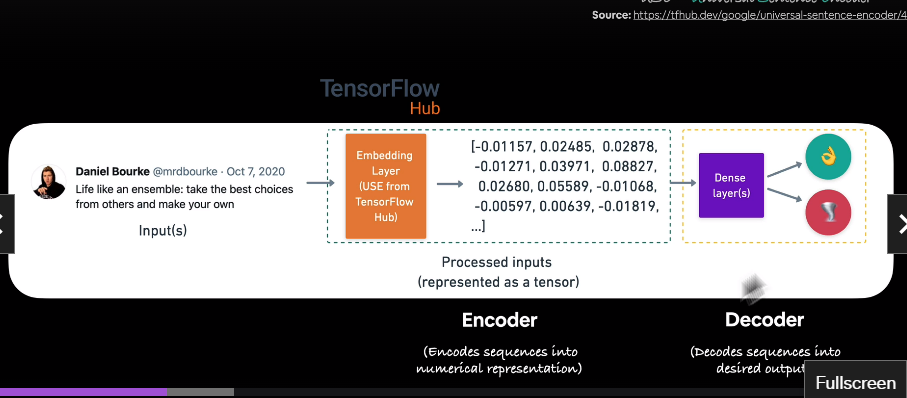

#Model 6:Tensorflow hub pretraines sentence encoder

In [128]:
import tensorflow_hub as hub
embed=hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [129]:
embed_samples=embed(["There's a flood in my street! ","When you can the universal sentence encoder on sentence, it turns into numbers."])
embed_samples.shape

TensorShape([2, 512])

In [130]:
embed_samples[0,:50]

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-0.01157028,  0.0248591 ,  0.02878048, -0.012715  ,  0.03971538,
        0.0882776 ,  0.02680984,  0.05589836, -0.0106873 , -0.00597291,
        0.00639323, -0.01819518,  0.00030813,  0.09105888,  0.05874644,
       -0.03180628,  0.01512474, -0.05162929,  0.00991367, -0.06865347,
       -0.04209306,  0.02678981,  0.03011006,  0.00321069, -0.00337973,
       -0.04787357,  0.0226672 , -0.00985925, -0.04063613, -0.01292092,
       -0.04666384,  0.05630299, -0.03949255,  0.00517686,  0.02495829,
       -0.0701444 ,  0.02871508,  0.04947684, -0.00633979, -0.08960192,
        0.02807118, -0.00808364, -0.01360602,  0.0599865 , -0.10361787,
       -0.05195374,  0.00232954, -0.02332531, -0.03758105,  0.03327728],
      dtype=float32)>

In [132]:
# embed_samples1=embed([text_vectorization("When you can the universal sentence encoder on sentence, it turns into numbers.")])
# embed_samples1.shape

In [133]:
# tf.compat.v1.enable_eager_execution(
#     config=None, device_policy=None, execution_mode=None
# )

In [134]:
sentence_encoder_layer=hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                      input_shape=[],
                                      # output_shape=[None,15,512],
                                      dtype=tf.string,
                                      trainable=False,
                                      name="USE" #Universal Sentence ENcoder
                                      )

In [135]:
# #Create model using sequential api
# inputs=layers.Input(shape=(1,), dtype=("string"))

# outputs=layers.Dense(1,activation="sigmoid")
# model_6=tf.keras.Model(inputs,outputs,name="model_6_pretrained")

In [136]:
from tensorflow.keras import regularizers

model_6=tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(128,activation="leaky_relu",
                 activity_regularizer=regularizers.L2(0.01)),
    # layers.Dropout(0.6),
    layers.Dense(128,activation="leaky_relu",
                 activity_regularizer=regularizers.L2(0.01)),
    # layers.Dropout(0.6),
    layers.Dense(32,activation="leaky_relu",
                 activity_regularizer=regularizers.L2(0.01)),
    # layers.Dropout(0.6),
    layers.Dense(1,activation="sigmoid",
                 activity_regularizer=regularizers.L2(0.05))
    ],name="model_6_USE")


In [137]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 256,884,161
Trainable params: 86,337
Non-trainable params: 256,797,824
_________________________________________________________________


In [138]:
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.0001),
                metrics=["accuracy"],
                experimental_run_tf_function=False)

In [139]:
model_6_history=model_6.fit(X_train,
            y_train,
            epochs=15,
            validation_data=(X_val,y_val),
            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_6_pretrained")])

Saving TensorBoard log files to: model_logs/model_6_pretrained/20230529-162259
Epoch 1/15
215/215 [==============================] - 9s 16ms/step - loss: 0.6554 - accuracy: 0.6803 - val_loss: 0.5710 - val_accuracy: 0.7927
Epoch 2/15
215/215 [==============================] - 3s 15ms/step - loss: 0.5076 - accuracy: 0.8040 - val_loss: 0.5050 - val_accuracy: 0.8005
Epoch 3/15
215/215 [==============================] - 4s 17ms/step - loss: 0.4685 - accuracy: 0.8199 - val_loss: 0.4904 - val_accuracy: 0.8058
Epoch 4/15
215/215 [==============================] - 3s 14ms/step - loss: 0.4511 - accuracy: 0.8276 - val_loss: 0.4817 - val_accuracy: 0.8123
Epoch 5/15
215/215 [==============================] - 3s 14ms/step - loss: 0.4392 - accuracy: 0.8330 - val_loss: 0.4758 - val_accuracy: 0.8189
Epoch 6/15
215/215 [==============================] - 4s 18ms/step - loss: 0.4292 - accuracy: 0.8399 - val_loss: 0.4701 - val_accuracy: 0.8176
Epoch 7/15
215/215 [==============================] - 3s 14ms/s

In [140]:
model_6_pred_probs=model_6.predict(X_val)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.10270192],
       [0.8064856 ],
       [0.9880304 ],
       [0.30056474],
       [0.6812589 ],
       [0.82397425],
       [0.98602015],
       [0.969185  ],
       [0.93038297],
       [0.07509059]], dtype=float32)

In [141]:
model_6_preds=tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [142]:
model_6_results=calc_results(y_val,model_6_preds)

In [143]:
model_6_results,baseline_results

({'accuracy': 82.93963254593176,
  'precision': 0.832197367968627,
  'recall': 0.8293963254593176,
  'f1-score': 0.8279439809006257},
 {'accuracy': 80.70866141732283,
  'precision': 0.8121588991665515,
  'recall': 0.8070866141732284,
  'f1-score': 0.8045685816460524})

#Model 7:TF Hub Pretrained USE but with 10% of training data

Transfer learning really helps when you dont have large dataset.

To see how our model performs on a smaller dataset, lets replicate `model_6` except we'll train it on only 10% of our data.

In [144]:
# Create subsets of 10% of the training data
len(df_shuffle)

7613

In [145]:
X_train

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       ...,
       'Near them on the sand half sunk a shattered visage lies... http://t.co/0kCCG1BT06',
       "kesabaran membuahkan hasil indah pada saat tepat! life isn't about waiting for the storm to pass it's about learning to dance in the rain.",
       "@ScottDPierce @billharris_tv @HarrisGle @Beezersun I'm forfeiting this years fantasy football pool out of fear I may win n get my ass kicked"],
      dtype=object)

> **Note:** Be very very *VERY* careful while creating train/test/val splits as they carelessness can lead to the data leakages across the dataset and the model may show wrong results.

Like here I created the train and test (10 percent) data from df_shuffle, From which botht eh training and validation data was created.

These means my 10 percent data has some val data too.which gives it false more accuracy and reaches 99 percent (*yes*).
Even on less data...

At first i thought this was because of model seeing less variation,though that was not issue as we had shuffled the data, so there was no data imbalance(also seen through count_values()).

Later this issue was caught. So be careful...

*if something looks too good, i mean the same model outperforming the one trained on the 100 percent of the data is kinda suspicious.*

In [146]:
# train_10_percent=df_shuffle[["text","target"]].sample(frac=0.1, random_state=42)
train_10_percent_X=pd.DataFrame(X_train).sample(frac=0.1, random_state=42)
train_10_percent_y=pd.DataFrame(y_train).sample(frac=0.1, random_state=42)
len(train_10_percent_X),len(train_10_percent_y)

(685, 685)

In [147]:
train_10_percent_X.head()

,0
1022,Families to sue over Legionnaires: More than 4...
5740,@Jones94Kyle now I've said all this he's dead ...
3153,@argentings WE COULD HAVE HAD IT AAAAAAALLLL I...
3276,Map: Typhoon Soudelor's predicted path as it a...
4874,So when r u getting married'@Foxy__Siren: Oh f...


In [148]:
train_10_percent_y.head()

,0
1022,1
5740,0
3153,1
3276,1
4874,0


In [149]:
X_train_10=train_10_percent_X
y_train_10=train_10_percent_y

In [150]:
len(X_train_10),len(y_train_10)

(685, 685)

In [151]:
train_10_percent_y.iloc[:,0].value_counts()

0    414
1    271
Name: 0, dtype: int64

In [152]:
df_shuffle["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [153]:
#loading the embeddings
import tensorflow_hub as hub
embed_layer=hub.KerasLayer(handle="https://tfhub.dev/google/universal-sentence-encoder/4",
                 trainable=False,
                 input_shape=[],
                 dtype=tf.string,
                 name="USE_1")


In [154]:
##Create the model

# model_7=tf.keras.Sequential([
#     embed_layer,
#     layers.Dense(32,activation="leaky_relu"
#                   #  activity_regularizer=regularizers.L2(0.0001), for regularization
#                   ),
#     layers.Dense(16,activation="leaky_relu"),
#     layers.Dense(8,activation="leaky_relu"),
#     layers.Dense(1,activation="sigmoid"),
#   ],name="model_7_10percent")

In [155]:
model_7=tf.keras.models.clone_model(model_6)
model_7._name="model_7_10percent"

In [156]:
#Summary
model_7.summary()

Model: "model_7_10percent"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 256,884,161
Trainable params: 86,337
Non-trainable params: 256,797,824
_________________________________________________________________


In [157]:
#compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.optimizers.Adam(),
                metrics=["accuracy"])

In [158]:
#fit or train the model
model_7_history=model_7.fit(X_train_10,
            y_train_10,
            validation_data=(X_val,y_val),
            epochs=5,
            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_7_10percent")])

Saving TensorBoard log files to: model_logs/model_7_10percent/20230529-162437
Epoch 1/5
22/22 [==============================] - 5s 47ms/step - loss: 0.6645 - accuracy: 0.6263 - val_loss: 0.6233 - val_accuracy: 0.6719
Epoch 2/5
22/22 [==============================] - 1s 24ms/step - loss: 0.5029 - accuracy: 0.8146 - val_loss: 0.5539 - val_accuracy: 0.7808
Epoch 3/5
22/22 [==============================] - 1s 28ms/step - loss: 0.3901 - accuracy: 0.8803 - val_loss: 0.5398 - val_accuracy: 0.7795
Epoch 4/5
22/22 [==============================] - 1s 25ms/step - loss: 0.3192 - accuracy: 0.9182 - val_loss: 0.5438 - val_accuracy: 0.7835
Epoch 5/5
22/22 [==============================] - 1s 28ms/step - loss: 0.2683 - accuracy: 0.9372 - val_loss: 0.5870 - val_accuracy: 0.7861


In [159]:
model_7_pred_probs=model_7.predict(X_val)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.19312367],
       [0.9854476 ],
       [0.991787  ],
       [0.15284564],
       [0.13303134],
       [0.9578121 ],
       [0.9655197 ],
       [0.9487891 ],
       [0.9652325 ],
       [0.06591333]], dtype=float32)

In [160]:
model_7_preds=tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [161]:
model_7_results=calc_results(y_val,model_7_preds)

In [162]:
model_7_results,baseline_results

({'accuracy': 78.60892388451444,
  'precision': 0.787706626889381,
  'recall': 0.7860892388451444,
  'f1-score': 0.7843264664117531},
 {'accuracy': 80.70866141732283,
  'precision': 0.8121588991665515,
  'recall': 0.8070866141732284,
  'f1-score': 0.8045685816460524})

#Comparing the performance of each of our models


In [163]:
#Combine model results into a DataFrame
all_model_results=pd.DataFrame({"0_baseline":baseline_results,
                                "1_ANN":model_1_results,
                                "2_LSTM":model_2_results,
                                "3_GRU":model_3_results,
                                "4_BI-LSTM":model_4_results,
                                "5_Convo1D":model_5_results,
                                "6_tf_hub_USE":model_6_results,
                                "7_tf_hub_USE_10%":model_7_results})
all_model_results=all_model_results.transpose()
all_model_results.iloc[:,0]=all_model_results.iloc[:,0]/100
all_model_results

,accuracy,precision,recall,f1-score
0_baseline,0.807087,0.812159,0.807087,0.804569
1_ANN,0.793963,0.798104,0.793963,0.791409
2_LSTM,0.786089,0.786647,0.786089,0.784865
3_GRU,0.771654,0.772820,0.771654,0.769833
4_BI-LSTM,0.594488,0.700753,0.594488,0.625005
5_Convo1D,0.775591,0.778046,0.775591,0.773229
6_tf_hub_USE,0.829396,0.832197,0.829396,0.827944
7_tf_hub_USE_10%,0.786089,0.787707,0.786089,0.784326


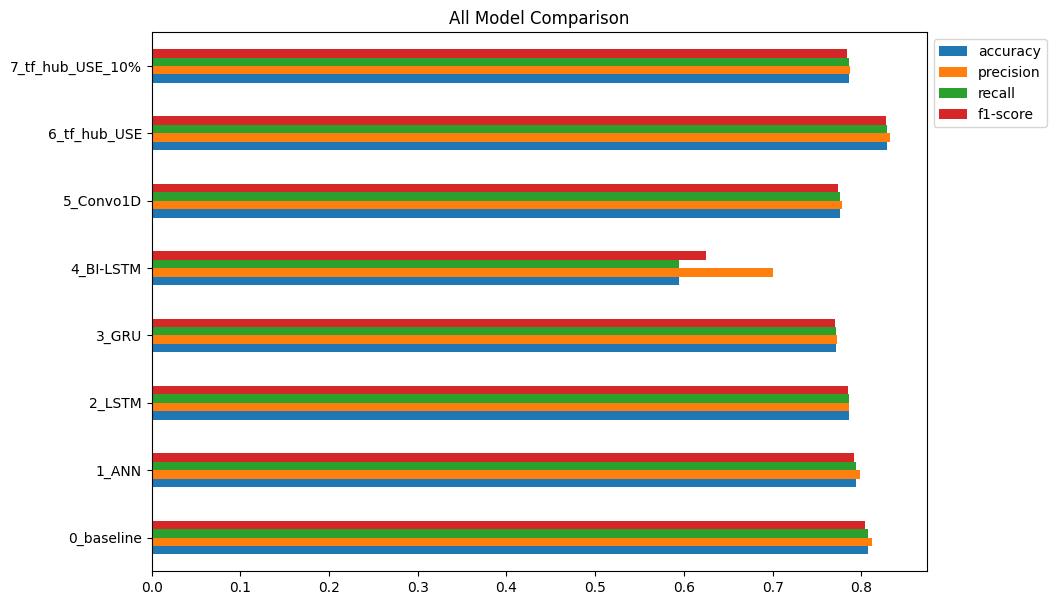

In [164]:
all_model_results.plot(kind="barh",figsize=(10,7),title="All Model Comparison").legend(bbox_to_anchor=(1.0,1.0));


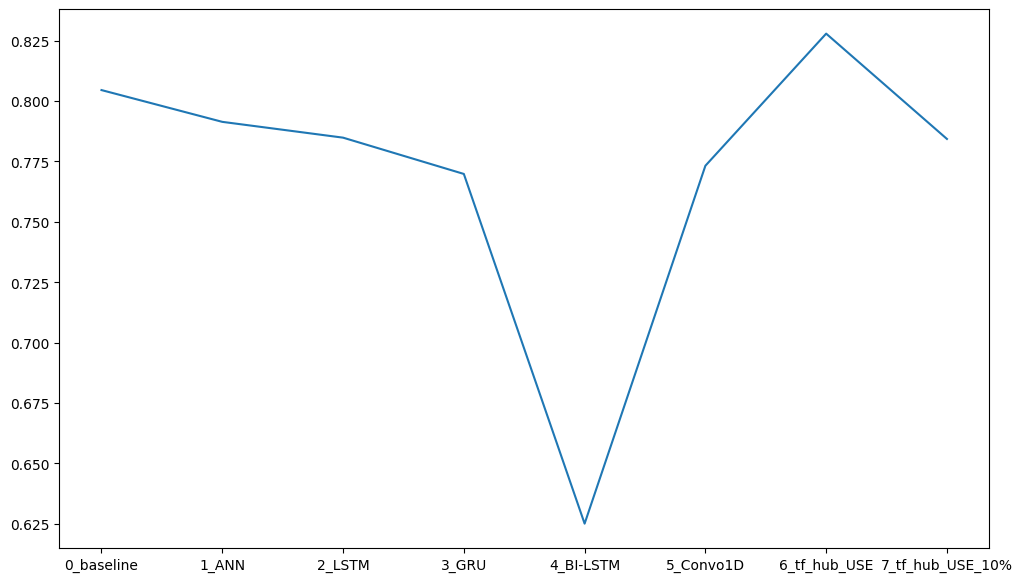

In [165]:
all_model_results["f1-score"].plot(figsize=(12,7));

<Axes: title={'center': 'f1-score All models'}>

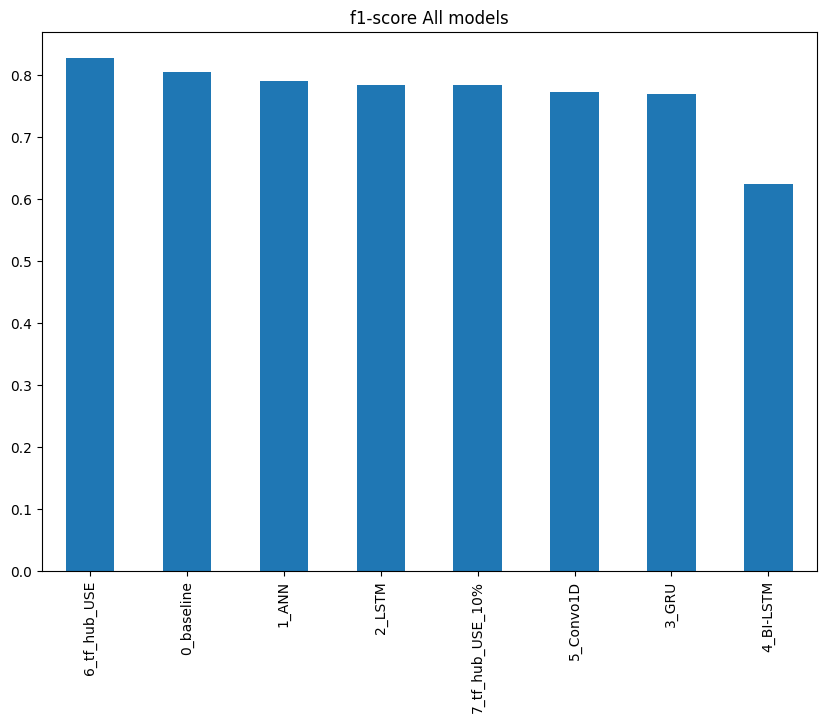

In [166]:
sorted=all_model_results.sort_values(by=["f1-score"],ascending=False)
sorted["f1-score"].plot(kind="bar",figsize=(10,7),title="f1-score All models")

#Uploading the model training logs to the TensorBoard.dev


In [167]:
# #View TensorBoard logs of transfer learning modelling experiments (plus all of our models)
# #Upload TensorBoard dev records
# !tensorboard dev upload --logdir ./model_logs/ \
#  --name "NLP Modelling Experiments on Tweets Classification Problems" \
#  --description "Comparing multiple different types of model architectures on the kaggle dataset on tweets classification" \
#  --one_shot #Exit the uploader once uploading is done

##To see the modelling experiments on tensorboard see here,

link: https://tensorboard.dev/experiment/khmHXm52QQikSGwbYLARTA/

In [168]:
!tensorboard dev list

2023-05-29 16:24:50.535205: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will list all experiments that you've uploaded to
https://tensorboard.dev. TensorBoard.dev experiments are visible
to everyone. Do not upload sensitive data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   ZXK-KYX-DKQ


https://tensorboard.dev/experiment/khmHXm52QQikSGwbYLARTA/
	Name                 NLP Modelling Experiments 

###Saving and loading the model in tf

1. The HDF5 format
2. The `SavedModel` format(this is the default when using tf)


In [169]:
#save TF hub sentence encoder model to hdf5 format
model_6.save("model_6.h5")

In [170]:
#Load the model back with custom hub layer (req with the hdf5 format)
load_model_6=tf.keras.models.load_model("model_6.h5",
                                        custom_objects={"KerasLayer": hub.KerasLayer})

In [171]:
##How does our loaded model perform
load_model_6.evaluate(X_val,y_val)

24/24 [==============================] - 1s 11ms/step - loss: 0.4572 - accuracy: 0.8294


[0.4572123885154724, 0.8293963074684143]

Saving to `SavedModel` format

In [172]:
model_6.save("model_6_SavedModel_format")

In [173]:
load_model_6_save=tf.keras.models.load_model("model_6_SavedModel_format")

In [174]:
load_model_6_save.evaluate(X_val,y_val)

24/24 [==============================] - 1s 10ms/step - loss: 0.4572 - accuracy: 0.8294


[0.4572123885154724, 0.8293963074684143]

In [190]:
model_6_pred_probs[:5]

array([[0.10270192],
       [0.8064856 ],
       [0.9880304 ],
       [0.30056474],
       [0.6812589 ]], dtype=float32)

In [176]:
s=model_6_pred_probs.sort()

#Model Driven Data Exploration


In [177]:
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip

--2023-05-29 16:28:38--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  55.9MB/s    in 17s     

2023-05-29 16:28:55 (54.1 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]



In [178]:
!unzip 08_model_6_USE_feature_extractor.zip

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.index  
  inflating: 08_model_6_USE_feature_extractor/saved_model.pb  


In [179]:
#Import prev stored model from Google Storage
loaded_model_6=tf.keras.models.load_model("08_model_6_USE_feature_extractor")
loaded_pred_probs=loaded_model_6.predict(X_val)

24/24 [==============================] - 1s 9ms/step


In [180]:
loaded_model_6.evaluate(X_val,y_val)

24/24 [==============================] - 1s 10ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [181]:
loaded_preds=tf.squeeze(tf.round(loaded_pred_probs))
loaded_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [182]:
#Create DataFrame with validation sentences and best performing model pred lables+probabilities
val_df=pd.DataFrame({"text":X_val,
                     "target":y_val,
                     "pred":loaded_preds,
                     "pred_probs":tf.squeeze(loaded_pred_probs)})

In [183]:
val_df

,text,target,pred,pred_probs
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808
...,...,...,...,...
757,That's the ultimate road to destruction,0,0.0,0.137074
758,@SetZorah dad why dont you claim me that mean ...,0,0.0,0.095865
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
760,Crack in the path where I wiped out this morni...,0,1.0,0.612631


In [184]:
val_df.sort_values(by=["pred_probs"])

,text,target,pred,pred_probs
593,Season 3 of New Girl was such a emotional trai...,0,0.0,0.012896
713,I hate that Im so awkward and I ruin things,0,0.0,0.020455
717,Some days I drown in my tears but I don't let ...,0,0.0,0.022529
589,my vibrator shaped vape done busted,0,0.0,0.023994
369,If you fill your mind with encouragement and p...,0,0.0,0.025258
...,...,...,...,...
395,The Catastrophic Effects of Hiroshima and Naga...,1,1.0,0.991882
257,USGS reports a M1.94 #earthquake 5km S of Volc...,1,1.0,0.992790
166,BBC News - India rail crash: Trains derail in ...,1,1.0,0.993717
179,beforeitsnews : Hundreds feared dead after Lib...,1,1.0,0.994646


In [185]:
#Wrongest Classification
val_df.head()

,text,target,pred,pred_probs
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [186]:
#Most Accurate Classification
val_df.tail()

,text,target,pred,pred_probs
757,That's the ultimate road to destruction,0,0.0,0.137074
758,@SetZorah dad why dont you claim me that mean ...,0,0.0,0.095865
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
760,Crack in the path where I wiped out this morni...,0,1.0,0.612631
761,I liked a @YouTube video from @dannyonpc http:...,0,0.0,0.117992


In [187]:
most_wrong=val_df[val_df["target"]!=val_df["pred"]].sort_values("pred_probs",ascending=False)
most_wrong[:10]

,text,target,pred,pred_probs
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


0 - not disaster

1 - disaster

In [188]:
most_wrong[-10:] #least wrong

,text,target,pred,pred_probs
536,@DavidVonderhaar At least you were sincere ??,1,0.0,0.067303
408,@willienelson We need help! Horses will die!Pl...,1,0.0,0.055076
294,Lucas Duda is Ghost Rider. Not the Nic Cage ve...,1,0.0,0.054603
221,going to redo my nails and watch behind the sc...,1,0.0,0.054597
59,You can never escape me. Bullets don't harm me...,1,0.0,0.049637
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043919
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


#Make predictions using test data

In [191]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [201]:
X_test=test_df['text'].to_numpy()

In [227]:
test_pred_probs=model_6.predict(X_test)
tf.squeeze(test_pred_probs)

102/102 [==============================] - 2s 18ms/step


<tf.Tensor: shape=(3263,), dtype=float32, numpy=
array([0.56369096, 0.8971169 , 0.8773508 , ..., 0.9505086 , 0.8032993 ,
       0.6627732 ], dtype=float32)>

In [203]:
test_preds=tf.squeeze(tf.round(test_pred_probs))
test_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0.], dtype=float32)>

In [234]:
check_pred(test_preds)

AttributeError: ignored

In [215]:
tf.squeeze(test_pred_probs).shape

TensorShape([3263])

In [1]:
test_preds.shape

NameError: ignored